In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
from HeadRegion import GetHeadDict
from keras.models import load_model
import tensorflow as tf
import numpy as np
import matplotlib.patches as patches

model = load_model(r'E:\GithubProjects\HelmetDetection\HelmetModel.h5')

def GetPrediction(img):
	fig, ax = plt.subplots(1, figsize=(16, 16))
	Height, Width = img.shape[:2]
	img = cv.resize(img, (480, int(480 * Height / Width)))

	HeadDict = GetHeadDict(img)
	im = ax.imshow(cv.cvtColor(HeadDict['originalimg'], cv.COLOR_BGR2RGB))

	for i, head in enumerate(HeadDict['headlist']):
		Prediction = model.predict(np.array(
			[head['head']]
		))

		Color = "red" if float(Prediction[0][0]) < 0.5 else "lightgreen"
		x0, y0, x1, y1 = head['headpos']
		rect = patches.Rectangle((x0, y0), x1-x0, y1-y0, linewidth=4, edgecolor=Color, facecolor='none')
		ax.add_patch(rect)

		ax.text(x=x0,
				y=y0-5,
				s=f"{int(Prediction * 100)} %   -   {i + 1}",
				color="white")
		ax.text(x=x0,
				y=y0-10,
				s=f"{int(Prediction * 100)} %   -   {i + 1}",
				color="black")
	return im

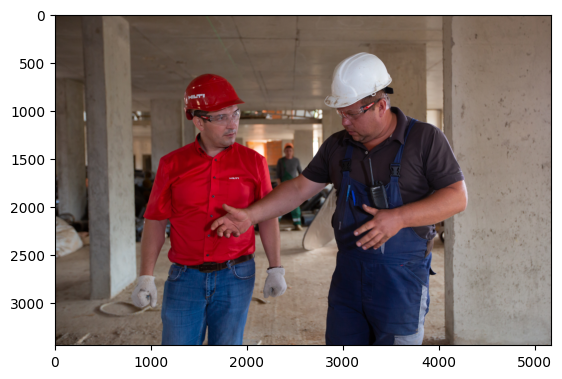

In [2]:
OriginalImage = cv.imread('E:\GithubProjects\HelmetDetection\TestImage.jpg')
plt.imshow(OriginalImage[:,:,::-1])

1/1 [==============================] - 0s 31ms/step


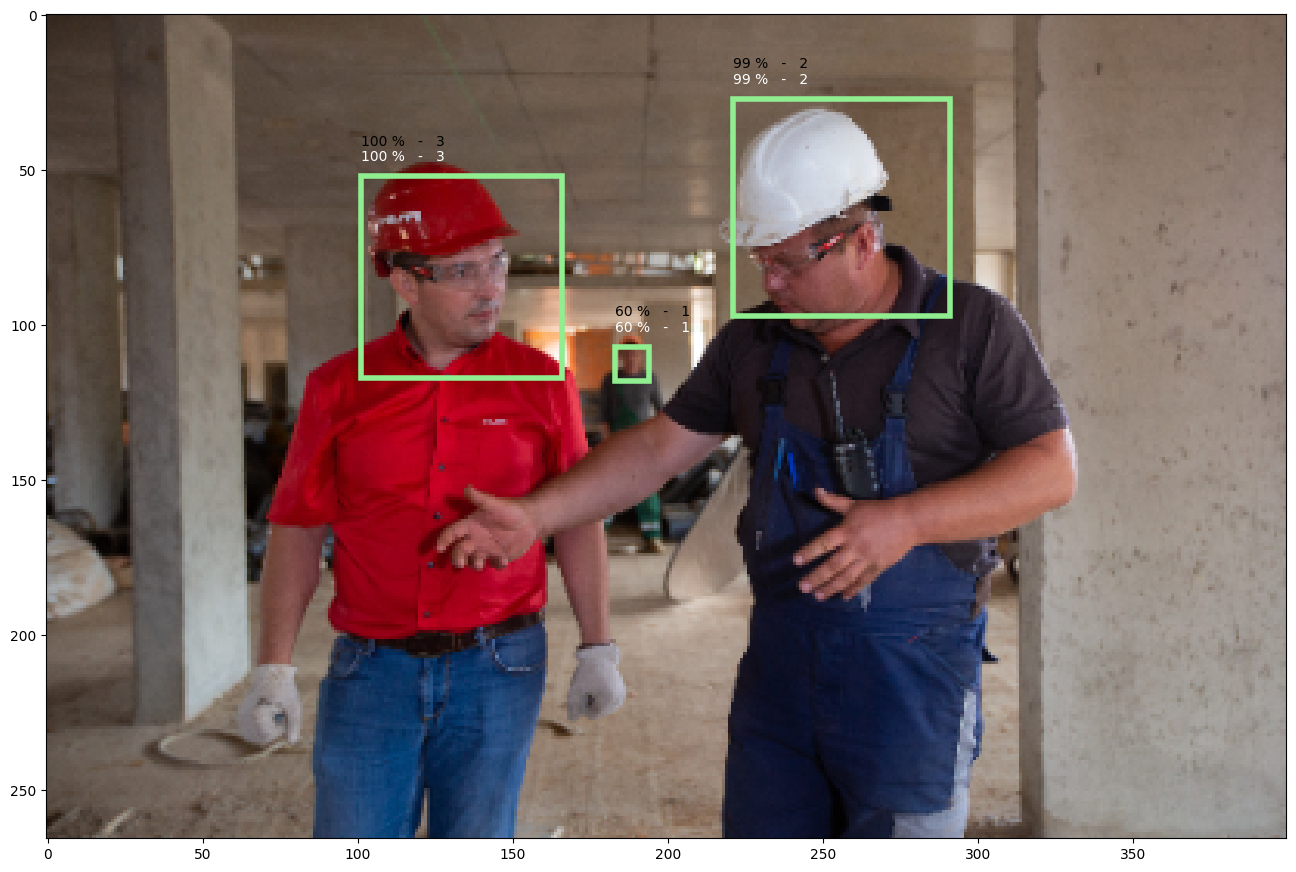

In [3]:
GetPrediction(OriginalImage)